In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [21]:
(xtrain,ytrain),(xtest,ytest)=datasets.cifar10.load_data()

In [3]:
ytrain

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [4]:
ytrain=ytrain.reshape(-1,)
ytest=ytest.reshape(-1,)

In [5]:
def plot(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])

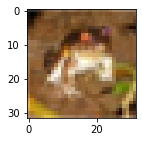

In [6]:
plot(xtrain,ytrain,0)

In [7]:
xtrain=xtrain/255.0
ytrain=ytrain/255.0

In [8]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [10]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(xtrain,ytrain,epochs=8)

Epoch 1/8
1563/1563 [==============================] - 69s 44ms/step - loss: 21.8771 - accuracy: 0.0978
Epoch 2/8
 268/1563 [====>.........................] - ETA: 57s - loss: 2.3028 - accuracy: 0.0992

In [13]:
ypred=cnn.predict(xtest)
ypred[:6]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [20]:
yc=[np.argmax(d) for d in ypred]
yc[:5]

[0, 0, 0, 0, 0]